In [31]:
pip install gymnax

/opt/anaconda3/envs/TPML/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install distrax

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install chex

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install flax

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install optax

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install jax

Note: you may need to restart the kernel to use updated packages.


In [58]:
import gymnax

In [59]:
gymnax.registered_envs

['CartPole-v1',
 'Pendulum-v1',
 'Acrobot-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Asterix-MinAtar',
 'Breakout-MinAtar',
 'Freeway-MinAtar',
 'SpaceInvaders-MinAtar',
 'Catch-bsuite',
 'DeepSea-bsuite',
 'MemoryChain-bsuite',
 'UmbrellaChain-bsuite',
 'DiscountingChain-bsuite',
 'MNISTBandit-bsuite',
 'SimpleBandit-bsuite',
 'FourRooms-misc',
 'MetaMaze-misc',
 'PointRobot-misc',
 'BernoulliBandit-misc',
 'GaussianBandit-misc',
 'Reacher-misc',
 'Swimmer-misc',
 'Pong-misc']

In [60]:
import jax

rng = jax.random.PRNGKey(0)
rng, key_reset, key_policy, key_step = jax.random.split(rng, 4)

# create the CartPole-v1 environment
env, env_params = gymnax.make('MountainCarContinuous-v0')
# inspect default environment settings
print("Environment parameters:", env_params)

Environment parameters: EnvParams(max_steps_in_episode=999, min_action=-1.0, max_action=1.0, min_position=-1.2, max_position=0.6, max_speed=0.07, goal_position=0.45, goal_velocity=0.0, power=0.0015, gravity=0.0025)


In [61]:
# Verify observation and action space
print("Action Space Size:", env.num_actions)

Action Space Size: 1


In [62]:
# observation space dimensionality
env.observation_space(env_params).shape

(2,)

In [63]:
obs, state = env.reset(key_reset, env_params)
obs, state

(Array([-0.58275205,  0.        ], dtype=float32),
 EnvState(time=Array(0, dtype=int32, weak_type=True), position=Array(-0.58275205, dtype=float32), velocity=Array(0., dtype=float32, weak_type=True)))

In [64]:
action = env.action_space(env_params).sample(key_policy)
n_obs, n_state, reward, done, _ = env.step(key_step, state, action, env_params)
n_obs, n_state, reward, done

(Array([-0.5808441 ,  0.00190795], dtype=float32),
 EnvState(time=Array(1, dtype=int32, weak_type=True), position=Array(-0.5808441, dtype=float32), velocity=Array(0.00190795, dtype=float32)),
 Array(-0.09559999, dtype=float32),
 Array(False, dtype=bool))

In [65]:
obs, state = env.reset(key_reset)
action = env.action_space().sample(key_policy)
n_obs, n_state, reward, done, _ = env.step(key_step, state, action)

In [66]:
vmap_reset = jax.vmap(env.reset, in_axes=(0, None))
vmap_step = jax.vmap(env.step, in_axes=(0, 0, 0, None))

num_envs = 8
vmap_keys = jax.random.split(rng, num_envs)

obs, state = vmap_reset(vmap_keys, env_params)
n_obs, n_state, reward, done, _ = vmap_step(vmap_keys, state, jax.numpy.zeros(num_envs), env_params)
print(n_obs.shape)

(8, 2)


In [5]:
import time
from RLinJAX import *

In [68]:
jax.devices()

[CpuDevice(id=0)]

In [69]:
algo.config

{'env': <gymnax.environments.classic_control.mountain_car.MountainCar at 0x3355dafd0>,
 'env_params': {'max_steps_in_episode': 200,
  'min_position': -1.2,
  'max_position': 0.6,
  'max_speed': 0.07,
  'goal_position': 0.5,
  'goal_velocity': 0.0,
  'force': 0.001,
  'gravity': 0.0025},
 'eval_callback': <function RLinJAX.algos.algorithm.Algorithm.create.<locals>.eval_callback(algo, ts, rng)>,
 'eval_freq': 4096,
 'skip_initial_evaluation': False,
 'total_timesteps': 131072,
 'learning_rate': 0.0003,
 'gamma': 0.99,
 'max_grad_norm': inf,
 'target_update_freq': 1,
 'polyak': 0.99,
 'normalize_observations': False,
 'num_envs': 1,
 'buffer_size': 131072,
 'fill_buffer': 2048,
 'batch_size': 256,
 'actor': {'action_dim': 3,
  'hidden_layer_sizes': (64, 64),
  'activation': <jax._src.custom_derivatives.custom_jvp at 0x336fb13d0>,
  'parent': None,
  'name': None},
 'critic': {'hidden_layer_sizes': (64, 64),
  'activation': <jax._src.custom_derivatives.custom_jvp at 0x32ac79d50>,
  'action

In [70]:
CONFIGS = {
    'env': 'MountainCarContinuous-v0',  # Environment ID
    'env_params': {},  # Placeholder for environment-specific parameters
    'eval_callback': None,  # Evaluation callback (if needed)
    'eval_freq': 10,  # Evaluate every 10 episodes
    'skip_initial_evaluation': False,
    'total_timesteps': 120000,  # Total timesteps for training
    'learning_rate': 0.0003,  # Learning rate (actor/critic can be separate if needed)
    'gamma': 0.99,  # Discount factor
    'max_grad_norm': 10.0,  # Maximum gradient norm
    'normalize_observations': False,  # Normalize observations if needed
    'target_update_freq': 200,  # Target network update frequency
    'polyak': 0.005,  # Polyak averaging coefficient
    'num_envs': 1,  # Single environment for SAC
    'buffer_size': 100000,  # Replay buffer size
    'fill_buffer': 1000,  # Minimum steps to fill buffer before training
    'batch_size': 100,  # Batch size for updates
    'eps_start': None,  # Not used for SAC
    'eps_end': None,  # Not used for SAC
    'exploration_fraction': None,  # Not used for SAC
    'num_epochs': 10,  # Number of epochs for training
    'ddqn': False,  # Not relevant for SAC
    'agent': 'SAC',  # Specify the SAC agent
    'agent_kwargs': {
        'activation': 'relu',  # Activation function
        'target_entropy_ratio': 1,  # !!!!!!!!!!!!!!!!!
        'num_critics': 2,  # Number of critic networks
        'actor_lr': 0.0003,  # Actor learning rate
        'critic_lr': 0.0003,  # Critic learning rate
        'alpha_lr': 0.0003,  # Temperature parameter learning rate
        'initial_alpha': 0.2,  # Initial temperature value
        'target_entropy': None,  # Defaults to -action_dim if not set
    }
}


In [71]:
algo_str = "sac" 
env_str = "MountainCarContinuous-v0"  

algo_cls = get_algo(algo_str)

algo = algo_cls.create(env=env_str, **CONFIGS.get(algo_str, {}))

In [72]:
# set training seed and jit train function
rng = jax.random.PRNGKey(0)
train_fn = jax.jit(algo.train)

print("Starting to train")
# Train
start = time.time()
train_state, evaluation = train_fn(rng)
time_elapsed = time.time() - start

sps = algo.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train
Finished training in 10.5653 seconds (12405.9 steps/second).


In [115]:
evaluation

(Array([[999, 999, 999, ..., 999, 999, 999],
        [999, 999, 999, ..., 999, 999, 999],
        [999, 999, 999, ..., 999, 999, 999],
        ...,
        [999, 999, 999, ..., 999, 999, 999],
        [999, 999, 999, ..., 999, 999, 999],
        [999, 999, 999, ..., 999, 999, 999]], dtype=int32, weak_type=True),
 Array([[-33.165565  , -35.20268   , -35.77535   , ..., -34.240616  ,
         -34.22136   , -35.19971   ],
        [-35.62312   , -34.804546  , -34.09568   , ..., -34.647663  ,
         -34.68889   , -35.512623  ],
        [-31.967274  , -29.528625  , -29.388062  , ..., -29.93014   ,
         -33.01257   , -31.232529  ],
        ...,
        [ -0.8744328 ,  -0.8820422 ,  -0.9971441 , ...,  -0.9323009 ,
          -0.8898563 ,  -0.899105  ],
        [ -0.8555738 ,  -0.82993597,  -0.8500246 , ...,  -0.8670457 ,
          -0.95531356,  -0.8441383 ],
        [ -0.7904207 ,  -0.75246745,  -0.7462856 , ...,  -0.8397933 ,
          -0.68479306,  -0.7759466 ]], dtype=float32))

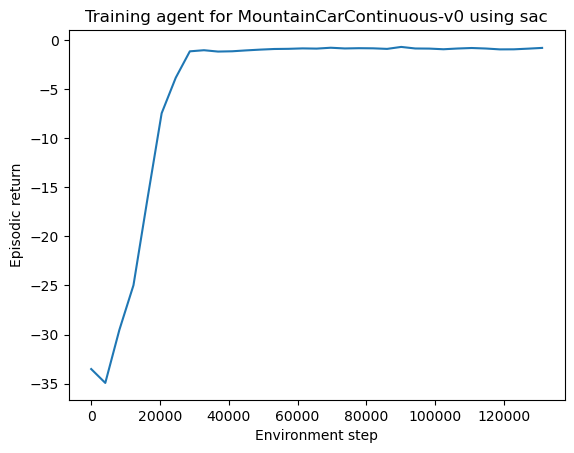

In [116]:
from matplotlib import pyplot as plt

episode_lengths, episode_returns = evaluation
mean_return = episode_returns.mean(axis=1)

plt.plot(jax.numpy.linspace(0, algo.total_timesteps, len(mean_return)), mean_return)
plt.xlabel("Environment step")
plt.ylabel("Episodic return")
plt.title(f"Training agent for {env_str} using {algo_str}")
plt.show()

In [6]:
import jax
import gymnax

rng = jax.random.PRNGKey(0)
rng, key_reset, key_policy, key_step = jax.random.split(rng, 4)

# create the CartPole-v1 environment
env, env_params = gymnax.make('MountainCar-v0')
# inspect default environment settings
print("Environment parameters:", env_params)

Environment parameters: EnvParams(max_steps_in_episode=200, min_position=-1.2, max_position=0.6, max_speed=0.07, goal_position=0.5, goal_velocity=0.0, force=0.001, gravity=0.0025)


In [7]:
CONFIGS = {
    'env': 'MountainCar-v0',  # Environment ID
    'env_params': {},  # Placeholder for environment-specific parameters
    'eval_freq': 10,  # Evaluate every 10 episodes
    'skip_initial_evaluation': False,
    'total_timesteps': 120000,  # Total timesteps for training
    'learning_rate': 0.0003,  # Learning rate (actor/critic can be separate if needed)
    'gamma': 0.99,  # Discount factor
    'max_grad_norm': 10.0,  # Maximum gradient norm
    'normalize_observations': False,  # Normalize observations if needed
    'target_update_freq': 200,  # Target network update frequency
    'polyak': 0.005,  # Polyak averaging coefficient
    'num_envs': 1,  # Single environment for SAC
    'buffer_size': 100000,  # Replay buffer size
    'fill_buffer': 1000,  # Minimum steps to fill buffer before training
    'batch_size': 100,  # Batch size for updates
    'eps_start': 1.0,
    'eps_end': 0.01,
    'exploration_fraction': 0.5,
    'num_epochs': 10,  # Number of epochs for training
    'ddqn': False,  # Not relevant for SAC
    'agent': 'SAC',  # Specify the SAC agent
    'agent_kwargs': {
        'activation': 'relu',  # Activation function
        'target_entropy_ratio': 0.98,  # !!!!!!!!!!!!!!!!!
        'num_critics': 2,  # Number of critic networks
        'actor_lr': 0.0003,  # Actor learning rate
        'critic_lr': 0.0003,  # Critic learning rate
        'alpha_lr': 0.0003,  # Temperature parameter learning rate
        'initial_alpha': 0.2,  # Initial temperature value
        'target_entropy': None,  # Defaults to -action_dim if not set
    }
}


In [8]:
algo_str = "sac" 
env_str = "MountainCar-v0"  

algo_cls = get_algo(algo_str)

algo = algo_cls.create(env=env_str, **CONFIGS.get(algo_str, {}))

In [9]:
algo = algo.replace(target_entropy_ratio=0.05)
print(f"New target_entropy_ratio: {algo.target_entropy_ratio}")

New target_entropy_ratio: 0.05


In [10]:
# set training seed and jit train function
rng = jax.random.PRNGKey(0)
train_fn = jax.jit(algo.train)

print("Starting to train")
# Train
start = time.time()
train_state, evaluation = train_fn(rng)
time_elapsed = time.time() - start

sps = algo.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train


/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 9.91911 seconds (13214.1 steps/second).


In [11]:
evaluation

(Array([[200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        ...,
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200]], dtype=int32, weak_type=True),
 Array([[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]],      dtype=float32, weak_type=True))

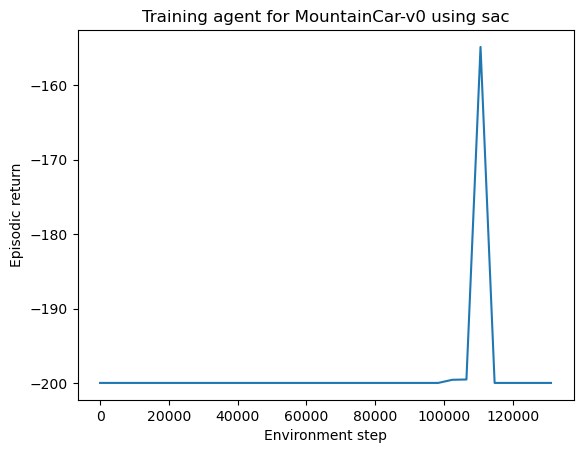

In [19]:
from matplotlib import pyplot as plt

episode_lengths, episode_returns = evaluation
mean_return = episode_returns.mean(axis=1)

plt.plot(jax.numpy.linspace(0, algo.total_timesteps, len(mean_return)), mean_return)
plt.xlabel("Environment step")
plt.ylabel("Episodic return")
plt.title(f"Training agent for {env_str} using {algo_str}")
plt.show()